<a href="https://colab.research.google.com/github/xyuech/Optimization-Algorithms/blob/main/CG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/UMich/IOE 691')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ConjugateGradient

In [ ]:
# Data Generation
b = np.ones([10])
x0 = np.zeros([10])

In [ ]:
np.random.seed(691)
# A1: identity matrix of dimension 10
A1 = np.eye(10)

# A2: a diagonal matrix with eigenvalues {1, 2, ..., 10}
A2 = np.diag(np.arange(1, 11))

# A3: a diagonal matrix with eigenvalues {1, 1, 1, 1, 1, 9, 9, 9, 10, 10}
eigenvalues_A3 = [1, 1, 1, 1, 1, 9, 9, 9, 10, 10]
A3 = np.diag(eigenvalues_A3)

# A4: a general symmetric positive definite matrix with eigenvalues {1, 1, ..., 1}
A4 = np.eye(10)

# A5: a general symmetric positive definite matrix with eigenvalues {1, 2, ..., 10}
eigenvalues_A5 = np.arange(1, 11)
V = np.random.rand(10, 10)
Q, _ = np.linalg.qr(V)
A5 = Q @ np.diag(eigenvalues_A5) @ Q.T

# A6: a general symmetric positive definite matrix with eigenvalues {1, 1, 1, 1, 1, 9, 9, 9, 10, 10}
eigenvalues_A6 = [1, 1, 1, 1, 1, 9, 9, 9, 10, 10]
V = np.random.rand(10, 10)
Q, _ = np.linalg.qr(V)
A6 = Q @ np.diag(eigenvalues_A6) @ Q.T

A =[A1, A2, A3, A4, A5, A6]

In [ ]:
# Create an instance of the ConjugateGradient class
cg = ConjugateGradient.ConjugateGradient(A[2], b, x0)  # Use the class name
cg.solve()
# ConjugateGradient(A[5], b, x0).solve()

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.11111111, 0.11111111, 0.11111111, 0.1       , 0.1       ]),
 [1.0, 0.6568047337278107, 0.09249999999999989, 1.1041597112415071e-32])

In [ ]:
# Solve the six problems and generate mean square error per iteration for plotting
error_history_ls = []
for i in range(6):
  cg = ConjugateGradient.ConjugateGradient(A[i], b, x0)
  _, r_ls = cg.solve()
  error_history_ls.append(r_ls)

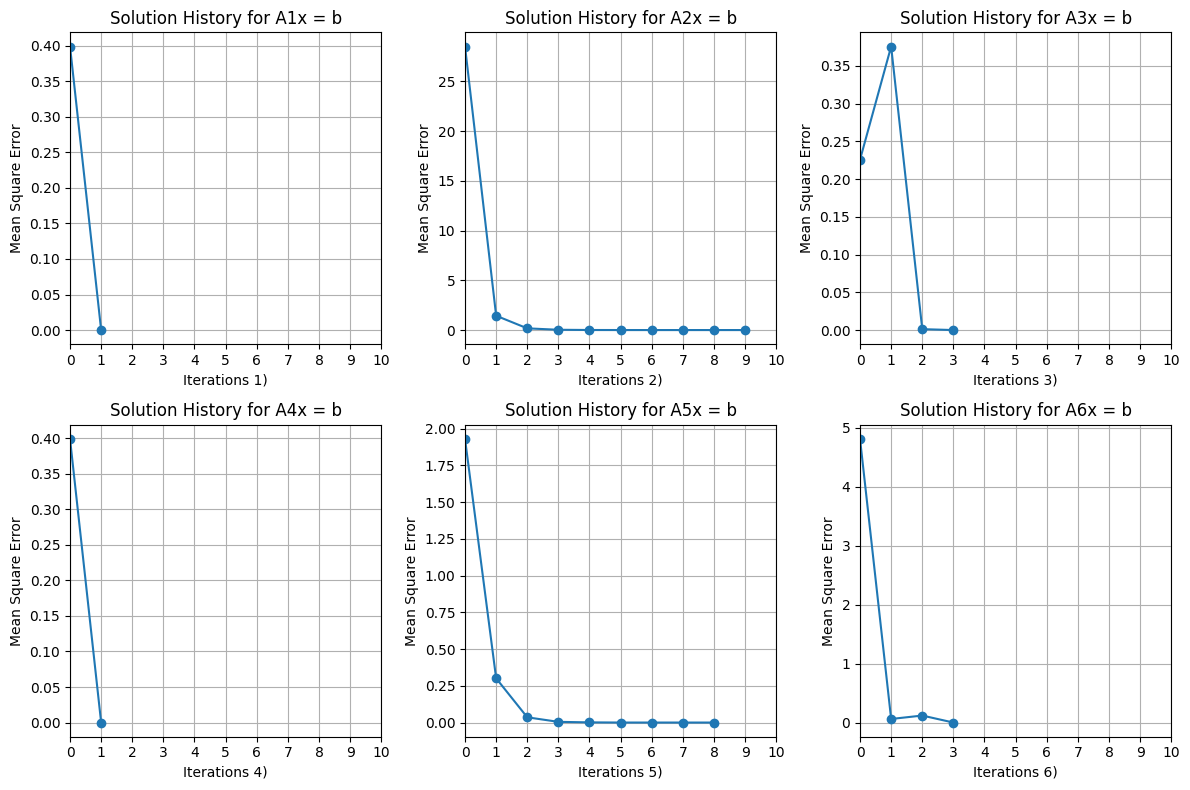

In [ ]:
def plot_values(values_list):
    if len(values_list) != 6:
        raise ValueError("The input must be a list of 6 lists of values.")

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()

    for i, values in enumerate(values_list):
        x = range(len(values))
        y = values

        axes[i].plot(x, y, marker='o')
        axes[i].set_xlabel(f'Iterations {i+1})')
        axes[i].set_ylabel('Mean Square Error')
        axes[i].set_title(f'Solution History for A{i+1}x = b')
        axes[i].grid(True)
        axes[i].set_xticks(range(11))
        axes[i].set_xlim(0, 10)

    plt.tight_layout()
    plt.show()

plot_values(error_history_ls)